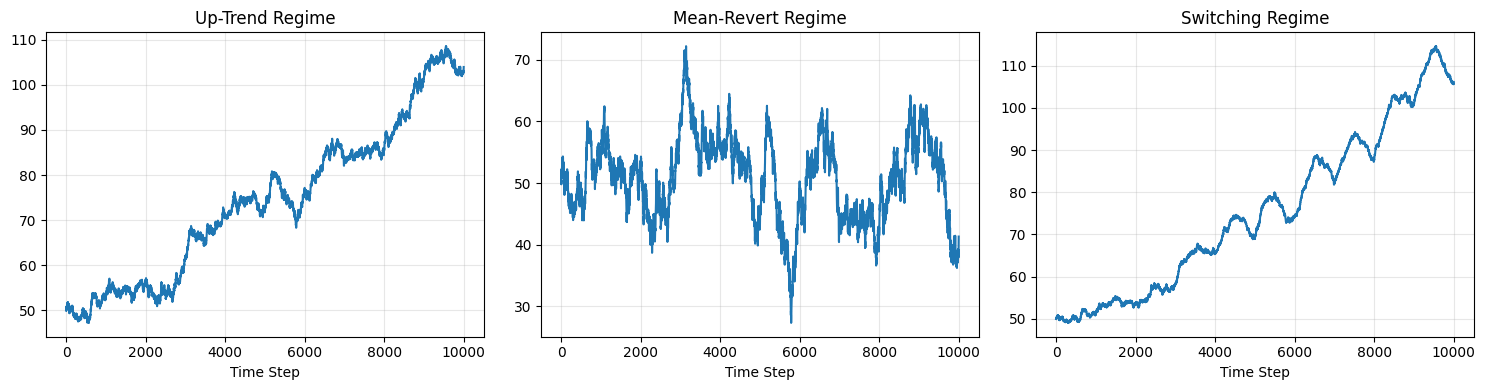

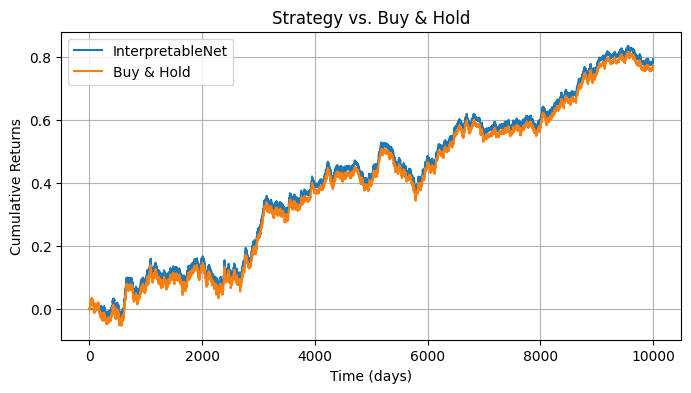

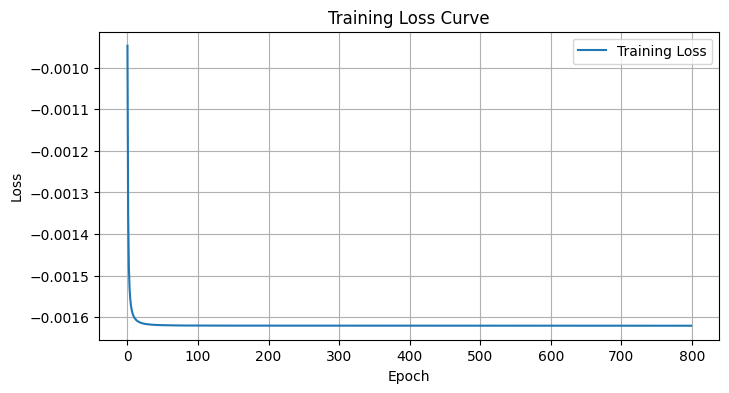

Sharpe ratio: 0.4410


In [1]:
# run_pipeline.ipynb

# 1) Imports
import torch
from torch.optim import Adam
from train      import prepare_artificial, train_model
from evaluate   import evaluate_model
from models     import PolicyNet
from models import TradingPolicy

# 2) Config
window_long, window_short = 200, 50
epochs = 800
lr     = 0.01

# 3) Prepare Data
data = prepare_artificial('trend', window_long, window_short)

# 4) Build & Train
model = TradingPolicy(window_short, window_long, beta=10.0)
optimizer = Adam(model.parameters(), lr=lr)
model, loss_history = train_model(
    model=model,
    data=data,
    optimizer=optimizer,
    is_real=False,    # or True
    window_long=window_long,
    epochs=epochs
)


# 5) Evaluate
evaluate_model(
    model=model,
    test_data=data,
    loss_history=loss_history,
    window_long=window_long,
    window_short=window_short,
    legend_labels=['InterpretableNet','Buy & Hold']
)



In [ ]:
# ─── 1. Setup & Helpers ────────────────────────────────────────────────
import torch, numpy as np, pandas as pd, matplotlib.pyplot as plt
from models import TradingPolicy
from train  import prepare_artificial, WINDOW, get_data
from evaluate import get_model_positions  # sliding‐window helper

def plot_performance(model, series_type, window_long):
    data = prepare_artificial(series_type, window_long, window_short)
    prices, returns = data['prices'], data['returns']

    pos = get_model_positions(model, prices, window_long)  # (T,)
    cum_model = torch.cumsum(returns * pos, dim=0).numpy()
    cum_bh    = np.cumsum(returns.numpy())

    plt.figure(figsize=(6,4))
    plt.plot(cum_model, label='InterpretableNet')
    plt.plot(cum_bh,     label='Buy & Hold')
    plt.title(f"{series_type.title()} Regime")
    plt.xlabel('Time (days)')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# ─── 2. Instantiate & (Re)train ────────────────────────────────────────
window_long, window_short = 200, 50
model = TradingPolicy(window_short, window_long, beta=10.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # try a smaller LR

data = prepare_artificial('trend', window_long, window_short)
model, loss_history = train_model(
    model=model, data=data, optimizer=optimizer,
    is_real=False, window_long=window_long, epochs=800
)

# ─── 3. Plot for all regimes ───────────────────────────────────────────
for regime in ['trend', 'switch', 'flat']:
    plot_performance(model, regime, window_long)
